# Tabulation of 2016 TTS Records

This document provides a tabulation and analysis of the __2016 TTS__ data. This was done with data from __*2016Records.csv*__ provided to us by James Vaughan.

__UPDATE 1.0__: After analyzing the records from the 2016 TTS dataset, we realized that there was a very large amount of respondents (__7,616 out of 19,855__ respondents) who did not input an answer for neither "Mode Taken to School" nor "Trip to School Time". We found that this large group of respondents was making the dataset harder to analyze, so we decided to remove them from the sample space, leaving us with a new sample size of __12,239__ respondents, which is still large enough to obtain decenly accurate statistics. 

__UPDATE 2.0__: We realized that we had an excessive number of 17-year-olds. This is because the TTS Records include every student, and not just post-secondary students. The consequence of this is that some of the respondents who we are assuming to be in post-secondary may actually be in high school and their data will not be representative of actual post-secondary commutes. As of right now and with the data we have, we were not able to figure out a good way to separate high school students from post-secondary students. We noticed that there were 440 respondents who claimed to take a school bus every day. Since this is only possible for high school students, we decided to remove this group of students as a way to make our analysis slightly more accurate. The sample size went from __12,239 to 11,799__ students.

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

respondents_file = '../../Data/TTS_2016/TTS_2016_Students.csv'
df = pd.read_csv(respondents_file)
df.head()

,HomeZone,SchoolZone,SchoolCode,Age,Sex,License,Occupation,EmploymentStatus,StudentStatus,Vehicles,IncomeClass,Adults,Children,ExpansionFactor,ModeTakenToSchool,TripToSchoolTime
0,133,134,2621,17,M,N,O,O,S,1,2,3,2,35.92,B,800
1,264,25,9244,19,M,N,O,O,S,2,3,5,0,42.03,B,1300
2,38,25,9243,22,M,Y,S,P,S,0,3,2,0,21.01,W,1000
3,1039,25,9244,26,M,Y,O,O,S,3,7,5,1,16.17,D,700
4,613,25,9244,19,M,Y,O,O,S,1,2,4,0,44.06,B,645


In [2]:
df = df[df['TripToSchoolTime'] > 0] # Remove 7616 rows with unknown mode choice and trip times
df = df[df['ModeTakenToSchool'] != 'S'] # Remove 440 rows with school bus mode choice

### 1. Gender Distribution
Let's begin by looking at the gender distribution of this survey:

In [3]:
df['Sex'].value_counts()

F    5961
M    5838
Name: Sex, dtype: int64

From this we see that we have a __50.5%__ of female respondents versus a __49.5%__ of male respondents. This is a much more balanced distribution of gender compared to the data from 2015 _StudentMoveTO_.

### 2. Age Distribution
Now, looking at the age distribution between the respondents:

count    11799.000000
mean        23.128655
std          8.816405
min         17.000000
25%         18.000000
50%         20.000000
75%         24.000000
max         98.000000
Name: Age, dtype: float64


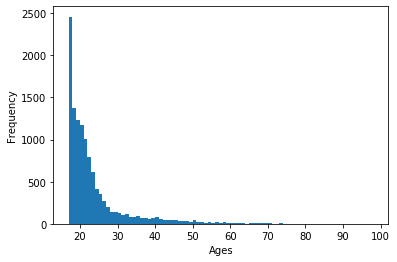

In [4]:
print(df['Age'].describe())

numBins = 81
plt.figure()
df['Age'].plot.hist(bins=numBins)
plt.xlabel('Ages')
plt.show()

Below are the 10 most populated age groups of the survey:

In [5]:
print(df['Age'].value_counts().sort_index()[:10])
print("")
print("Number of respndents under 27 years of age: ")
print(np.sum(df['Age'] <= 26))

17    2459
18    1379
19    1228
20    1170
21    1011
22     795
23     614
24     412
25     351
26     265
Name: Age, dtype: int64

Number of respndents under 27 years of age: 
9684


From this we can see that __83%__ of respondents are between the ages of 17 and 26.

### 3. Student Status Distribution
Next we will look at the student status distribution, where we have the following groups (as outlined in the 2016 TTS Data Guide):

- __S__: Full-time
- __P__: Part-time
- __O__: Not a student

In [6]:
df['StudentStatus'].value_counts()

S    10594
P     1205
Name: StudentStatus, dtype: int64

This shows that __90%__ of the respondents are full-time students. Also, the absence of any 'O' tells us that every respondent in this data set is a student. 

### 4. Employment Status Distribution
Similarly, we can look at the employment status of the respondents. As outlined in the 2016 TTS Data Guide, we have the following groups:

- __F__: Full-time job
- __P__: Part-time job
- __H__: Work at home full-time
- __J__: Work at home part-time
- __O__: Not employed
- __9__: Unknown

In [7]:
df['EmploymentStatus'].value_counts()

O    7400
P    3793
F     451
J     129
H      21
9       5
Name: EmploymentStatus, dtype: int64

So, even though more than half of the students are not employed while studying, __37%__ of them do have parallel jobs (especially __part-time__). 

### 5. Income Class Distribution
Another way we can classify the respondents is by income class:

| Income Class | Income (in dollars) |
|---|---|
| 1 | 0 to 14,999 |
| 2 | 15,000 to 39,999|
| 3 | 40,000 to 59,999|
| 4 | 60,000 to 99,999|
| 5 | 100,000 to 124,999|
| 6 | 125,000 and above|
| 7 | Decline / don't know|

In [8]:
df['IncomeClass'].value_counts()

4    2416
7    2153
6    2081
2    1610
3    1606
5    1224
1     709
Name: IncomeClass, dtype: int64

We can see that the students are very evenly distributed among income classes, with the __4th__ income class being slighly more populated, and the __1st__ income class being the least populated. Also, __18%__ percent of the respondents chose not to answer or they did not know.

### 6. Number of Owned Vehicles Distribution
Let's look at the distribution of the number of vehicles in a student's household:

In [9]:
print(df['Vehicles'].value_counts())
print("\nAverage Number of Vehicles Owned:")
print(np.mean(df['Vehicles']))

2     4324
1     3684
3     1656
0     1492
4      492
5      107
6       29
7       11
12       3
8        1
Name: Vehicles, dtype: int64

Average Number of Vehicles Owned:
1.7033646919230443


While __68%__ of students claim to own one or two cars, there is also a signifficant percentage of students who have no cars, or who have three or more cars. There are also 3 students who claim to have 12 cars, which is slightly improbable and could therefore be an outlier.

### 7. Mode of Transportation Distribution
We also have data about the mode of transportation taken to school by the respondents (as outlined by the 2016 TTS Data Guide):

- __B__: Public Transit (excluding GO Rail)
- __C__: Bicycle
- __D__: Auto Driver
- __G__: GO Rail
- __J__: Joint GO Rail and Public Transit
- __M__: Motorcycle
- __O__: Other
- __P__: Auto Passenger
- __S__: School Bus
- __T__: Taxi
- __U__: Paid rideshare (Uber, Lyft,...)
- __W__: Walk
- __9__: Unknown

Let us see the distribution of mode choices, keeping in mind that 38% of students did not provide information about their mode choice and that 440 students whose listed mode was school bus were removed from the dataframe.

In [10]:
print(df['ModeTakenToSchool'].value_counts())
print()
print(df['ModeTakenToSchool'].value_counts(normalize=True))

B    5337
D    2419
P    1771
W    1462
J     315
C     247
G     177
U      38
T      16
M      11
O       6
Name: ModeTakenToSchool, dtype: int64

B    0.452326
D    0.205017
P    0.150097
W    0.123909
J    0.026697
C    0.020934
G    0.015001
U    0.003221
T    0.001356
M    0.000932
O    0.000509
Name: ModeTakenToSchool, dtype: float64


__45%__ of students take public transportation, and __35%__ either drive or are dirven by car to shool.

This data is better understood in pie chart forms (shown below).

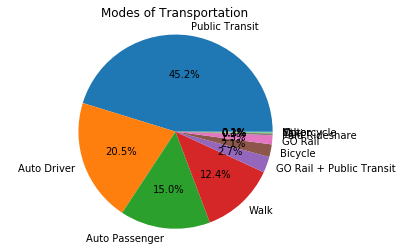

In [11]:
fig, ax = plt.subplots()
labels=['Public Transit', 'Auto Driver', 'Auto Passenger', 'Walk', 'GO Rail + Public Transit', 'Bicycle', 'GO Rail', 'Paid Rideshare', 'Taxi', 'Motorcycle', 'Other']
ax.pie(df['ModeTakenToSchool'].value_counts(), labels=labels, autopct='%1.1f%%')
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
ax.set_title('Modes of Transportation')
plt.show()

### 8. Trip-to-School Time Distribution
Now, let's look at the "Trip to School Time" distribution (time values are measured in seconds).

count    11799.000000
mean       922.929740
std        263.590928
min        400.000000
25%        750.000000
50%        830.000000
75%       1000.000000
max       2505.000000
Name: TripToSchoolTime, dtype: float64


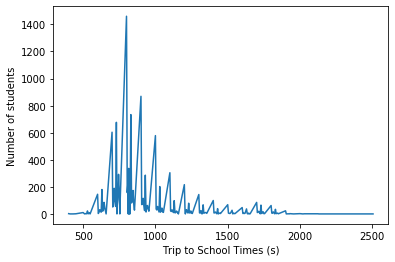

In [12]:
print(df['TripToSchoolTime'].describe())

fig = plt.figure()
plt.tight_layout()
plt.xlabel('Trip to School Times (s)')
plt.ylabel("Number of students")
df['TripToSchoolTime'].value_counts().sort_index().plot(kind='line')
plt.show()

One thing to notice is that the fequency of trip times has a cyclic element to it. This might be because of the convenience of listing trip times as a round number, such as a multiple of 100. Another noticeable point is that almost all the trip times were under 30 minutes long. This suggests that the sample underrepresents students with longer commutes, such as those commuting to a downtown campus from the suburbs.

### 9. Special NOTE about "Unknowns":

All the distributions shown above in sections 1 to 8 were calculated without respondents that answerd "Unknown" for both the 'Mode taken to School' and the 'Trip to School Time' category or those who identified "School Bus" as their mode choice. Several things to notice about this step:

- Female population went down from __52%__ to __50.5%__. Now we almost have a __50/50__ gender distribution.
- The number of older respondents went down. Even though we lost people from all ages proportionally to the original number of students in each age group, there was a decrease in the average age from __25__ to __23 years-old__.
- The number of part-time students decreased significantly. Now we have __90% full-time__ students as opposed to our previous __76% full-time__ students. 
- The employement rate also went down a lot, now we have __37%__ of students being employed whereas before it was __46%__ of students being employed.

#### Possible Reasons:

The reason for the changes observed above could be that part-time students and those that are employed probably have very irregular commutes in terms of both mode and travel time, and therefore they did not know what to answer for these questions. It is also possible that most of their commutes are not from home to school, but rather from work to school, leading them to leave those categories blank. It also makes sense that this group of people corresponds to a slightly older population since it is likely for many graduate students (or simply older students) to have jobs parallel to their studies.


### 10. Trip-to-School Time for each Mode of Transportation
Below, we are going to look at the time-to-school distributions of students for each of the transportation modes outlined in Section 7.

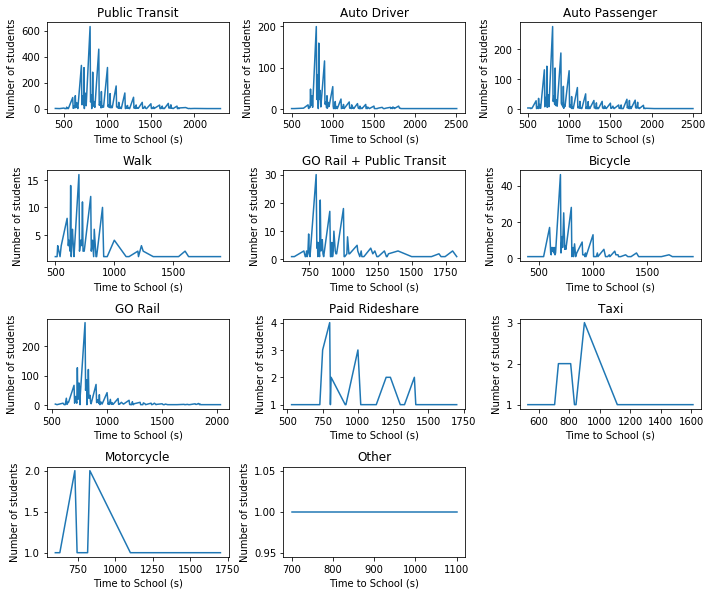

In [13]:
modes = ['Public Transit', 'Auto Driver', 'Auto Passenger', 'Walk', 'GO Rail + Public Transit','Bicycle','GO Rail','Paid Rideshare','Taxi','Motorcycle','Other']
fig = plt.figure(figsize=(10,10))
x = df['ModeTakenToSchool'].unique()
for i in range(len(x)):
    temp = df.loc[df['ModeTakenToSchool'] == x[i]]   
    fig.add_subplot(5, 3, i+1)
    plt.tight_layout()
    plt.title(str(modes[i]))
    plt.xlabel("Time to School (s)")
    plt.ylabel("Number of students")
    temp['TripToSchoolTime'].value_counts().sort_index().plot(kind='line')
plt.show()

The results above generally make sense. Those those, for example, take around 15 minutes to get to school, meaning that they live closer to their campus. Those who take the GO Rail or who are driven to school also seem to take aproximately 15 minutes, which means that they live further, but still have a similar commute time. There are several categories that are clearly underrepresented, and these are Taxi and Motorcycles, whose resutls may be innacurate. I also noticed that the results for the GO Rail + Public Transit graph are not highly accurate. Personally, as someone who belongs to this category (I take the GO Train from Pickering to Union and then the TTC from Union to St. George), it takes me about one hour (3600 seconds) to get to school, which might be longer than average, but the values shown in the graph are significantly lower than what I experience. I think that a time of 850 sec (14 minutes) is quite unlikely for someone that takes both modes of transprotation, and makes me question the reliability of this data. 

### 11. Mode of Transportation for Full-Time vs Part-Time Students
I also want to observe how the distribution of modes of transportation changes between full-time and part-time students (the meaning of each letter can be found in Section 7):

In [14]:
FT_df = df[df['StudentStatus'] == 'S']
PT_df = df[df['StudentStatus'] == 'P']

print('Full-Time Students: Mode of Transportation')
print(FT_df['ModeTakenToSchool'].value_counts())
print('\nPart-Time Students: Mode of Transportation')
print(PT_df['ModeTakenToSchool'].value_counts())

Full-Time Students: Mode of Transportation
B    4869
D    1980
P    1665
W    1333
J     301
C     219
G     170
U      29
T      14
M       8
O       6
Name: ModeTakenToSchool, dtype: int64

Part-Time Students: Mode of Transportation
B    468
D    439
W    129
P    106
C     28
J     14
U      9
G      7
M      3
T      2
Name: ModeTakenToSchool, dtype: int64


Or shown in a pie chart format:

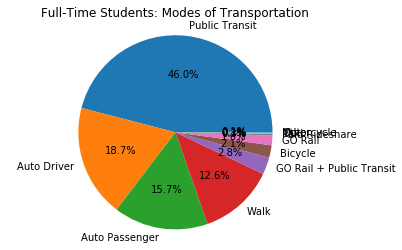

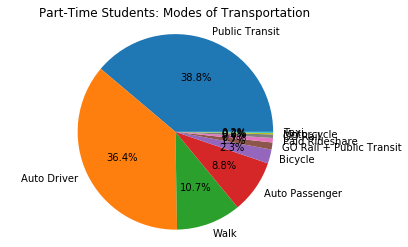

In [15]:
labels=['Public Transit', 'Auto Driver', 'Auto Passenger', 'Walk', 'GO Rail + Public Transit', 'Bicycle', 'GO Rail', 'Paid Rideshare', 'Taxi', 'Motorcycle', 'Other']
fig, ax = plt.subplots()
ax.pie(FT_df['ModeTakenToSchool'].value_counts(), labels=labels, autopct='%1.1f%%')
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
ax.set_title('Full-Time Students: Modes of Transportation')
plt.show()

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['Public Transit', 'Auto Driver', 'Walk', 'Auto Passenger', 'Bicycle', 'GO Rail + Public Transit','Paid Rideshare', 'GO Rail', 'Motorcycle', 'Taxi']
fig, ax = plt.subplots()
ax.pie(PT_df['ModeTakenToSchool'].value_counts(), labels=labels, autopct='%1.1f%%')
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
ax.set_title('Part-Time Students: Modes of Transportation')
plt.show()

We can see that __46%__ of full-time students take the public transit to school, while for part-time students it is __38.8%__. This may be due to the fact that a big number of full-time students live in residence or in appartments in the city where their campus is located. Another noticeable thing is that __45.1%__ of part-time students use a car as their mode of transportation, while only __34.4%__ of full-time students get to school by car. A reason for this may be that part-time students probably need to move around a more, making it easier to commute by car. 

## Next Steps:
- Segmentation of _TTS_ Data the same way it was done for _StudentMoveTO_ data (by education level and living arrangement). Education level may have to be estimated from age distributions looking at _SMTO_ data. 
- Find way to filter out all those 17/18-year olds who may be in high school, whose data will not be representative of post-secondar student travels. 